# Examples of execution of Simple calculations of PyBigDFT

In [15]:
def run_bigdft(*args, **kwargs):
    from BigDFT import Calculators as C
    code = C.SystemCalculator()       
    log = code.run(*args,**kwargs)
    return log if log is not None else None

In [3]:
from BigDFT.Database import Molecules as M

In [4]:
sys=M.get_molecule('HCN')

In [5]:
sys.display()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

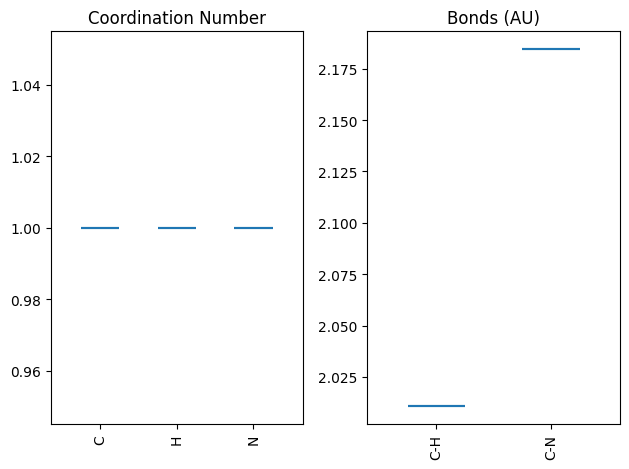

In [7]:
_=sys.examine()

In [8]:
from BigDFT import Inputfiles as I

In [11]:
inp=I.Inputfile()
inp.set_hgrid(0.4)
inp.set_xc('PBE')
inp.set_psp_nlcc(elements=list(sys.get_types()))

In [16]:
log=run_bigdft(input=inp,sys=sys,name='HCN', skip=True)

Initialize a Calculator with OMP_NUM_THREADS=1 and command /opt/bigdft/install/bin/bigdft
Creating the yaml input file "./HCN.yaml"
Executing command:  /opt/bigdft/install/bin/bigdft -n HCN -s Yes
 <BigDFT> Run already performed, found final file: forces_HCN.yaml
 Memory Consumption Report:
   Tot. No. of Allocations:  0
   Tot. No. of Deallocations:  0
   Remaining Memory (B):  0
   Memory occupation:
     Peak Value (MB):  0.000
     for the array: null
     in the routine: null
     Memory Peak of process: 92.164 MB
 Walltime since initialization:  00:00:00.460133694
 Max No. of dictionaries used:  1106 #( 1040 still in use)
 Number of dictionary folders allocated:  1


<Axes: xlabel='Energy [eV]', ylabel='DoS'>

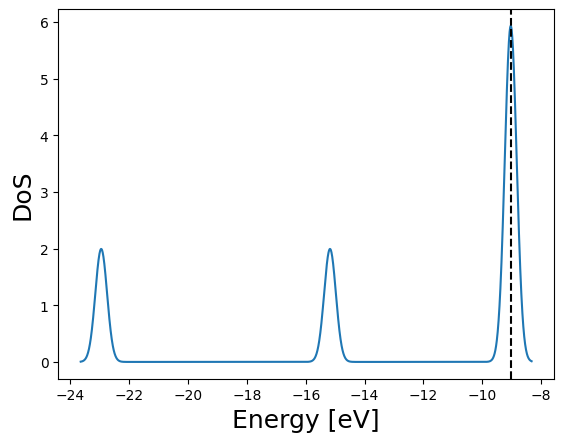

In [18]:
log.get_dos().plot()

In [19]:
log.evals

[BandArray([[-0.8435698 , -0.55769018, -0.3332528 , -0.33119262,
             -0.33119232]])]

# Dry run the same exemple

In [22]:
#to recompile for re-execution
from BigDFT.Interop import RemoteManagerInterop as R
print(R.recompile_locally())
from importlib import reload
from BigDFT import Calculators
reload(Calculators)

appended run runner-0
Staging Dataset... Staged 1/1 Runners
Transferring for 1/1 Runners
Transferring 4 Files... Done
Remotely executing 1/1 Runners
Fetching results
Transferring 2 Files... Done
Warning! Found 1 error(s), also check the `errors` property!
*** Checking out PyBigDFT *** [1/1]
]0;jhbuild:Checking out PyBigDFT [1/1]*** Building PyBigDFT *** [1/1]
]0;jhbuild:Building PyBigDFT [1/1]/opt/intel/oneapi/intelpython3/bin/python3 setup.py build --build-base /opt/bigdft/PyBigDFT
*** Installing PyBigDFT *** [1/1]
]0;jhbuild:Installing PyBigDFT [1/1]/opt/intel/oneapi/intelpython3/bin/python3 setup.py build --build-base /opt/bigdft/PyBigDFT install --prefix /opt/bigdft/install --root /opt/bigdft/install/_jhbuild/root-PyBigDFT
*** success *** [1/1]
]0;jhbuild:success [1/1]Compilation ended
Errors:
I: Install complete: 544 files copied


<module 'BigDFT.Calculators' from '/opt/bigdft/install/lib/python3.12/site-packages/BigDFT/Calculators.py'>

In [23]:
from os import environ

In [67]:
environ['BIGDFT_MPIDRYRUN']='1'

In [68]:
log=run_bigdft(input=inp,sys=sys,name='HCN')

Initialize a Calculator with OMP_NUM_THREADS=1 and command /opt/bigdft/install/bin/bigdft
Creating the yaml input file "./HCN.yaml"
Executing command:  /opt/bigdft/install/bin/bigdft-tool -a memory-estimation -l --name=HCN -n 1
 <BigDFT> log of the run will be written in logfile: ./log-HCN.yaml
 <BigDFT> Logfile existing, renamed into: ./logfiles/log-HCN.21:04:08.679.yaml


# Geometry optimization after semantic verification

In [57]:
#inp['mode']={'method': 'lj'}
#inp.pop('mode')
environ['BIGDFT_MPIDRYRUN']='0'
inp['geopt']={'method': 'LBFGS', 'forcemax': 0.0001}

In [58]:
log=run_bigdft(input=inp,sys=sys,name='HCN')

Initialize a Calculator with OMP_NUM_THREADS=1 and command /opt/bigdft/install/bin/bigdft
Creating the yaml input file "./HCN.yaml"
Executing command:  /opt/bigdft/install/bin/bigdft -n HCN
 <BigDFT> log of the run will be written in logfile: ./log-HCN.yaml
 <BigDFT> Logfile existing, renamed into: ./logfiles/log-HCN.18:21:17.471.yaml
Found 24 different runs


<Axes: xlabel='Energy - min(Energy)', ylabel='Forcemax'>

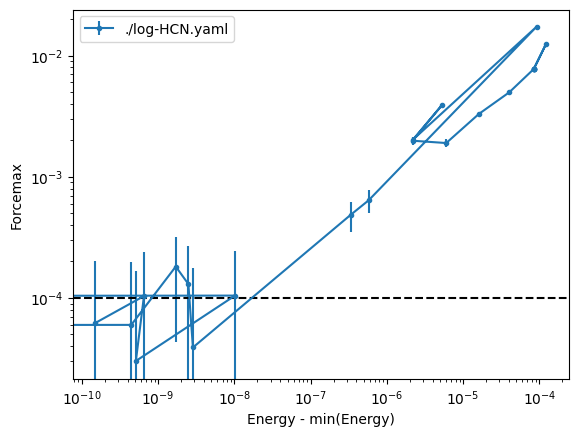

In [59]:
log.geopt_plot()

In [60]:
from BigDFT import Systems as S
sys0=S.system_from_log(log)

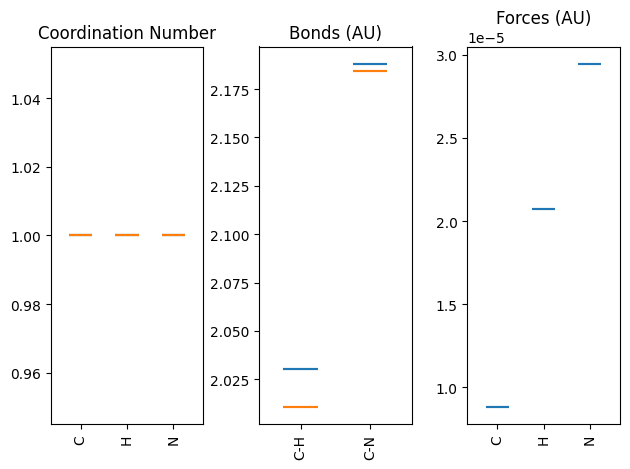

In [63]:
after=sys0.examine()
_=sys.examine(axs=after['axs'])


In [66]:
sys0.display(by_types=True)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [ ]:
def test_bigdft():
    from BigDFT.Database import Molecules as M
    from BigDFT import Calculators as C
    from BigDFT import Inputfiles as I
    inp=I.Inputfile()
    inp.set_hgrid(0.4)
    inp.set_xc('PBE')
    inp.set_psp_nlcc(elements=list(sys.get_types()))
    sys=M.get_molecule('HCN')
    code = C.SystemCalculator()       
    log = code.run(input=inp,sys=sys,name='HCN')
    return log if log is not None else None